

---



# Install libraries

In [ ]:
!conda install -y gdown
!pip install google-play-scraper

/bin/bash: line 1: conda: command not found


In [ ]:
!pip install PySastrawi

# Import Library

In [ ]:
from google_play_scraper import Sort, reviews_all, reviews
import re
import pandas as pd
import numpy as np
import datetime as dt
import string
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, classification_report
# from google_play_scraper import Sort, reviews_all, reviews
import nltk
# import calendar
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Retrieve a user review of the Netflix application from the Google Play web site.

In [ ]:
#scraping review netflix
#netflix, continuation_token = reviews('com.netflix.mediaclient', # defaults to 0
#                                        lang='id', # defaults to 'id'
#                                        country='id', # defaults to 'id'
#                                        sort=Sort.NEWEST, # defaults to sort.MOST_RELEVANT
#                                        count=3000)

In [ ]:
#data_netflix = pd.DataFrame(netflix)
#data_netflix

In [ ]:
#data_netflix.to_excel('data_netflixcoba.xlsx', index=False)
#data_netflix

# Connect & import the datasets from Google Drive

In [ ]:
!gdown --id 17cWkAphd8OgN-Hqpfow57jUXwrwbx5HL

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=17cWkAphd8OgN-Hqpfow57jUXwrwbx5HL
To: /content/data_netflix.xlsx
100% 126k/126k [00:00<00:00, 93.3MB/s]


# Read the dataset

In [ ]:
netflix = pd.read_excel('data_netflix.xlsx')
netflix.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,2218bfc9-962c-4956-9916-f2dc76658e50,gegas tanor,https://play-lh.googleusercontent.com/a-/ALV-U...,Mantap nonton jadi lebih seru,5,0,8.112.1 build 6 50665,2024-04-29 04:56:03,NaN,NaN,8.112.1 build 6 50665
1,d5272cf1-b250-4bd1-8d29-697d577a3c56,Runyati Basila,https://play-lh.googleusercontent.com/a-/ALV-U...,Lebih di Tingkatkan lagi,5,0,8.112.1 build 6 50665,2024-04-29 04:54:50,NaN,NaN,8.112.1 build 6 50665
2,b34bce76-4d67-41ed-9901-e234211d51f2,mhjrr_ 002,https://play-lh.googleusercontent.com/a-/ALV-U...,Aplikasi terbaik buat nonton flim,5,0,8.112.1 build 6 50665,2024-04-29 04:53:27,NaN,NaN,8.112.1 build 6 50665
3,58a78685-2d93-42ee-94f7-a6714537d49e,Leni Yuli,https://play-lh.googleusercontent.com/a/ACg8oc...,Aplikasi bagus,5,0,8.112.1 build 6 50665,2024-04-29 04:53:20,NaN,NaN,8.112.1 build 6 50665
4,83c4bc1b-e8e0-4f1c-8dd3-93d3749b4c52,dn. i,https://play-lh.googleusercontent.com/a-/ALV-U...,"aplikasi luar biasa, mudah di gunakan",5,0,8.112.1 build 6 50665,2024-04-29 04:46:05,NaN,NaN,8.112.1 build 6 50665




---



# Data Exploration

## Displays the entire dataset column

In [ ]:
netflix.columns

Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt', 'appVersion'],
      dtype='object')

## Summary

In [ ]:
# menampilkan ringkasan dataset yang berisi jumlah baris dan tipe data
info = netflix.info()
print('Ringkasan informasi:', info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 796 entries, 0 to 795
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              796 non-null    object        
 1   userName              796 non-null    object        
 2   userImage             796 non-null    object        
 3   content               796 non-null    object        
 4   score                 796 non-null    int64         
 5   thumbsUpCount         796 non-null    int64         
 6   reviewCreatedVersion  574 non-null    object        
 7   at                    796 non-null    datetime64[ns]
 8   replyContent          0 non-null      float64       
 9   repliedAt             0 non-null      float64       
 10  appVersion            574 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 68.5+ KB
Ringkasan informasi: None


## Find Missing Values

In [ ]:
# menghitung dan menampilkan missing values
print('Jumlah missing values disetiap kolom:\n', netflix.isnull().sum())

Jumlah missing values disetiap kolom:
 reviewId                  0
userName                  0
userImage                 0
content                   0
score                     0
thumbsUpCount             0
reviewCreatedVersion    222
at                        0
replyContent            796
repliedAt               796
appVersion              222
dtype: int64


## Remove Missing Values

In [ ]:
# menghapus kolom replyContent, repliedAt, dan reviewCreatedVersion yang berisi missing values
netflix = netflix.drop(['replyContent','repliedAt','reviewCreatedVersion'], axis=1)
netflix.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,at,appVersion
0,2218bfc9-962c-4956-9916-f2dc76658e50,gegas tanor,https://play-lh.googleusercontent.com/a-/ALV-U...,Mantap nonton jadi lebih seru,5,0,2024-04-29 04:56:03,8.112.1 build 6 50665
1,d5272cf1-b250-4bd1-8d29-697d577a3c56,Runyati Basila,https://play-lh.googleusercontent.com/a-/ALV-U...,Lebih di Tingkatkan lagi,5,0,2024-04-29 04:54:50,8.112.1 build 6 50665
2,b34bce76-4d67-41ed-9901-e234211d51f2,mhjrr_ 002,https://play-lh.googleusercontent.com/a-/ALV-U...,Aplikasi terbaik buat nonton flim,5,0,2024-04-29 04:53:27,8.112.1 build 6 50665
3,58a78685-2d93-42ee-94f7-a6714537d49e,Leni Yuli,https://play-lh.googleusercontent.com/a/ACg8oc...,Aplikasi bagus,5,0,2024-04-29 04:53:20,8.112.1 build 6 50665
4,83c4bc1b-e8e0-4f1c-8dd3-93d3749b4c52,dn. i,https://play-lh.googleusercontent.com/a-/ALV-U...,"aplikasi luar biasa, mudah di gunakan",5,0,2024-04-29 04:46:05,8.112.1 build 6 50665


## Rename the columns

In [ ]:
# mengganti nama kolom tanggal
netflix.rename(columns={'at':'date'},inplace=True)
print('mengecek nama kolom yang sudah diganti:', netflix.columns)

mengecek nama kolom yang sudah diganti: Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'date', 'appVersion'],
      dtype='object')


## Separate the date in the timestamp of the At column

In [ ]:
# memisahkan tanggal yang terletak di timestamps
netflix['date'] = pd.to_datetime(netflix['date']).dt.date
netflix.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,date,appVersion
0,2218bfc9-962c-4956-9916-f2dc76658e50,gegas tanor,https://play-lh.googleusercontent.com/a-/ALV-U...,Mantap nonton jadi lebih seru,5,0,2024-04-29,8.112.1 build 6 50665
1,d5272cf1-b250-4bd1-8d29-697d577a3c56,Runyati Basila,https://play-lh.googleusercontent.com/a-/ALV-U...,Lebih di Tingkatkan lagi,5,0,2024-04-29,8.112.1 build 6 50665
2,b34bce76-4d67-41ed-9901-e234211d51f2,mhjrr_ 002,https://play-lh.googleusercontent.com/a-/ALV-U...,Aplikasi terbaik buat nonton flim,5,0,2024-04-29,8.112.1 build 6 50665
3,58a78685-2d93-42ee-94f7-a6714537d49e,Leni Yuli,https://play-lh.googleusercontent.com/a/ACg8oc...,Aplikasi bagus,5,0,2024-04-29,8.112.1 build 6 50665
4,83c4bc1b-e8e0-4f1c-8dd3-93d3749b4c52,dn. i,https://play-lh.googleusercontent.com/a-/ALV-U...,"aplikasi luar biasa, mudah di gunakan",5,0,2024-04-29,8.112.1 build 6 50665


In [ ]:
# memisahkan tahun dan bulan
netflix['year'] = pd.to_datetime(netflix['date']).dt.year
netflix['month'] = pd.to_datetime(netflix['date']).dt.month

# Data Visualization

<ipython-input-232-65a8e4d7358b>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




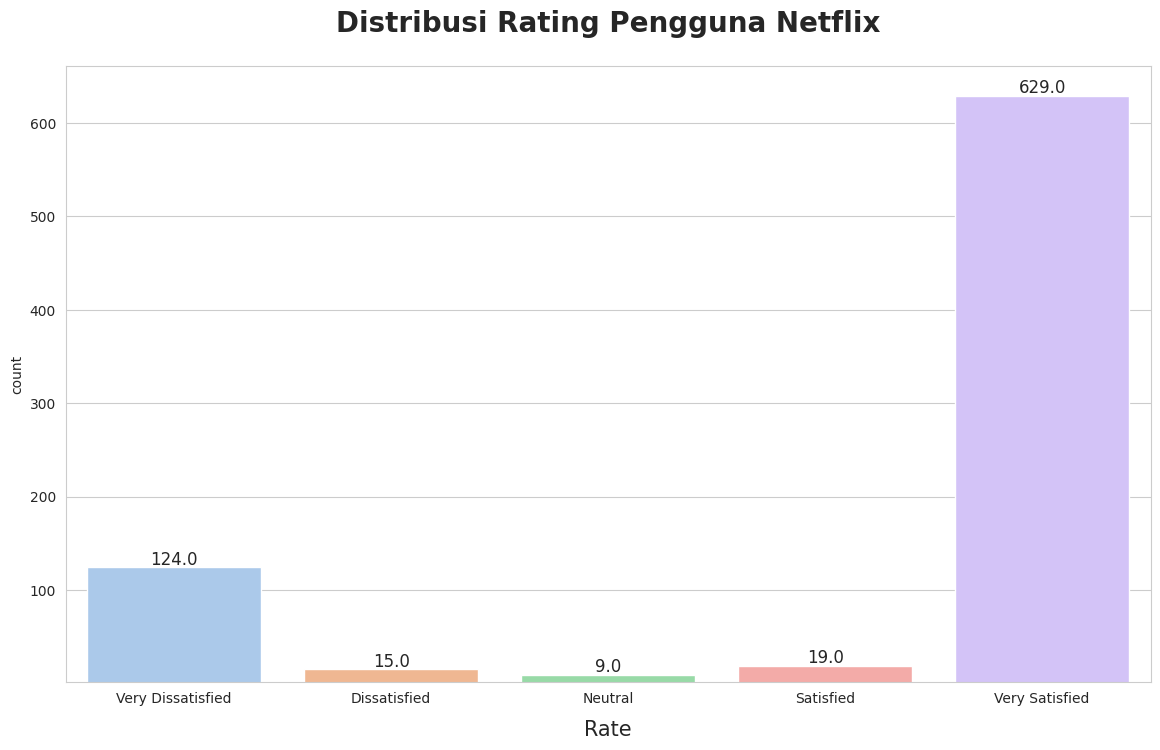

In [ ]:
# visualisasi bar chart untuk melihat jumlah rating pengguna Netflix
fig, ax = plt.subplots(figsize=(14,8))
position = (0,1,2,3,4)
labels = ("Very Dissatisfied","Dissatisfied","Neutral","Satisfied","Very Satisfied")

ax = sns.set_style('whitegrid')
ax = sns.countplot(x="score", data=netflix, palette="pastel")

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,
             rect.get_height()+ 3.25,rect.get_height(),
             horizontalalignment='center', fontsize = 12)

plt.title('Distribusi Rating Pengguna Netflix', fontsize=20, fontweight='bold', pad=25)
plt.xlabel('Rate', fontsize=15, labelpad=10)
plt.xticks(position, labels)
plt.ylim(1)
plt.show()

In [ ]:
grouped_data = netflix.groupby(['score', 'year']).size().reset_index(name='count')

In [ ]:
label_mapping = {
    "Very Dissatisfied": 0,
    "Dissatisfied": 1,
    "Neutral": 2,
    "Satisfied": 3,
    "Very Satisfied": 4
}

grouped_data['score'] = grouped_data['score'].map(label_mapping)

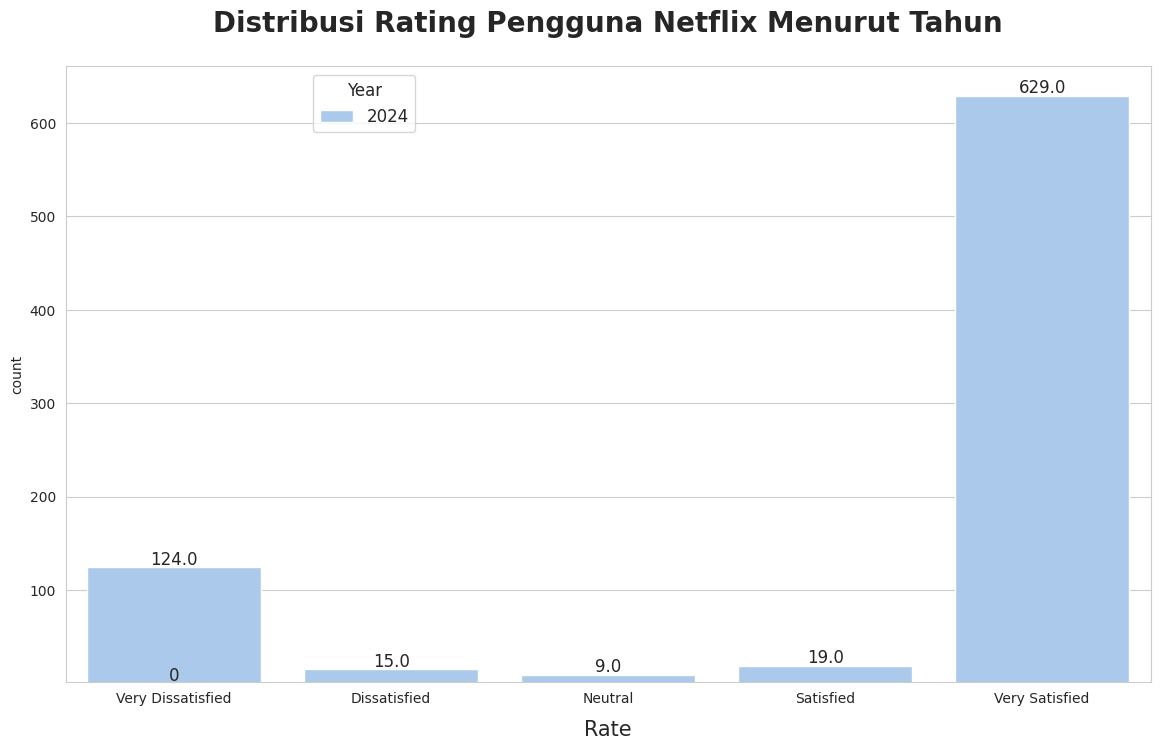

In [ ]:
# mem-breakdown bar chart pada sel sebelumnya berdasarkan tahun
fig, ax = plt.subplots(figsize=(14,8))
position = (0,1,2,3,4)
labels = ("Very Dissatisfied","Dissatisfied","Neutral","Satisfied","Very Satisfied")

ax = sns.set_style('whitegrid')
ax = sns.countplot(x="score", hue="year", data=netflix, palette="pastel")

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,
             rect.get_height()+ 3.25,rect.get_height(),
             horizontalalignment='center', fontsize = 12)

plt.legend(fontsize=12, bbox_to_anchor=(0.33,1), ncol = 3, title="Year", title_fontsize=12)
plt.title('Distribusi Rating Pengguna Netflix Menurut Tahun', fontsize=20,
          fontweight='bold', pad=25)
plt.xlabel('Rate', fontsize=15, labelpad=10)
plt.xticks(position, labels)
plt.ylim(1)
plt.show()

## Delete unnecessary columns and does not provide any information.

In [ ]:
netflix.drop(['reviewId','userName','userImage','score','thumbsUpCount','date','year','month'], axis=1, inplace=True)

In [ ]:
print('Ringkasan dataset setelah dilakukan manipulasi data', netflix.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 796 entries, 0 to 795
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   content     796 non-null    object
 1   appVersion  574 non-null    object
dtypes: object(2)
memory usage: 12.6+ KB
Ringkasan dataset setelah dilakukan manipulasi data None


In [ ]:
netflix.head()

,content,appVersion
0,Mantap nonton jadi lebih seru,8.112.1 build 6 50665
1,Lebih di Tingkatkan lagi,8.112.1 build 6 50665
2,Aplikasi terbaik buat nonton flim,8.112.1 build 6 50665
3,Aplikasi bagus,8.112.1 build 6 50665
4,"aplikasi luar biasa, mudah di gunakan",8.112.1 build 6 50665


## Delete Duplicate Data that contain in the content column

In [ ]:
# menghitung jumlah ulasan yang duplikasi
netflix.duplicated().sum()

105

In [ ]:
# menghapus duplikasi ulasan agar nantinya model tidak mempelajari kata yang sama secara berulang
netflix.drop_duplicates(inplace=True)

In [ ]:
# mengecek kembali jumlah duplikat setelah di hapus
netflix.duplicated().sum()

0



---



# Data Preparation

## Case Folding

In [ ]:
# merubah jenis huruf menjadi huruf kecil
def lowercase(review_text):
  low = review_text.lower()
  return low

netflix['clean_review'] = netflix['content'].apply(lambda low:lowercase(str(low)))

In [ ]:
netflix.head()

,content,appVersion,clean_review
0,Mantap nonton jadi lebih seru,8.112.1 build 6 50665,mantap nonton jadi lebih seru
1,Lebih di Tingkatkan lagi,8.112.1 build 6 50665,lebih di tingkatkan lagi
2,Aplikasi terbaik buat nonton flim,8.112.1 build 6 50665,aplikasi terbaik buat nonton flim
3,Aplikasi bagus,8.112.1 build 6 50665,aplikasi bagus
4,"aplikasi luar biasa, mudah di gunakan",8.112.1 build 6 50665,"aplikasi luar biasa, mudah di gunakan"


# Cleaning Data

## Remove the emoji of the text.

In [ ]:
# menghapus emoji menggunakan regex dan nilai unicode dari emoji

def remove_emoji(review_text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\U0001f926-\U0001f937"
                           u"\U00010000-\U0010ffff"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', review_text)

netflix['clean_review'] = netflix['clean_review'].apply(lambda emoji: remove_emoji(emoji))

## remove hashtag

In [ ]:
# menghapus hashtag dari ulasan yang biasanya digunakan oleh pengguna untuk memberikan tagar
# terkait topik dari ulasan yang diutarakan

def remove_hashtag(review_text, default_replace=""):
  hashtag = re.sub(r'#\w+', default_replace, review_text)
  return hashtag

netflix['clean_review'] = netflix['clean_review'].apply(lambda hashtag: remove_hashtag(hashtag))

## remove punctuation and number

In [ ]:
# menghapus angka dalam ulasan

def remove_number(review_text, default_replace=" "):
  num = re.sub(r'\d+', default_replace, review_text)
  return num

netflix['clean_review'] = netflix['clean_review'].apply(lambda num: remove_number(num))

In [ ]:
# menghapus tanda baca

def remove_punctuation(review_text, default_text=" "):
  list_punct = string.punctuation
  delete_punct = str.maketrans(list_punct,' '*len(list_punct))
  new_review = ' '.join(review_text.translate(delete_punct).split())

  return new_review

netflix['clean_review'] = netflix['clean_review'].apply(lambda punct: remove_punctuation(punct))

In [ ]:
# menghapus superscript dalam ulasan yang biasa digunakan oleh pengguna dalam mengulangi kata

def remove_superscript(review_text):
  number = re.compile("["u"\U00002070"
                      u"\U000000B9"
                      u"\U000000B2-\U000000B3"
                      u"\U00002074-\U00002079"
                      u"\U0000207A-\U0000207E"
                      u"U0000200D"
                      "]+", flags=re.UNICODE)
  return number.sub(r'', review_text)

netflix['clean_review'] = netflix['clean_review'].apply(lambda num: remove_superscript(num))

## remove words repetition

In [ ]:
# melakukan pembatasan jumlah huruf menjadi dua untuk mengembalikan kata ke bentuk awal
# dan menghindari terjadinya kata ganda yang memiliki arti sama tetapi berbeda penulisan

def word_repetition(review_text):
  review = re.sub(r'(.)\1+', r'\1\1', review_text)
  return review

netflix['clean_review'] = netflix['clean_review'].apply(lambda word: word_repetition(word))

In [ ]:
# melakukan pembatasan kata berulang menjadi satu kali, seperti suka suka -> suka

def repetition(review_text):
  repeat = re.sub(r'\b(\w+)(?:\W\1\b)+', r'\1',review_text, flags=re.IGNORECASE)
  return repeat

netflix['clean_review'] = netflix['clean_review'].apply(lambda word: repetition(word))

## remove whitespaces

In [ ]:
# menghapus spasi berlebih dalam ulasan

def remove_extra_whitespaces(review_text):
  review = re.sub(r'\s+',' ', review_text)
  return review

netflix['clean_review'] = netflix['clean_review'].apply(lambda extra_spaces: remove_extra_whitespaces(extra_spaces))

## remove another words which doesn't give any information

In [ ]:
bannedword = ['uqjy', 'dehdje', 'jwdnmb', 'wxvlezuvws', 'ircel', 'swjjw', 'dmv',
         'dxrgz','qjtajuq','zzhwntdft','xywrfw' ,'fztnmdrrduy' ,'xsezuz',
         'kbyv', 'iyyveyzqkdgm', 'arlrmdjy', 'sfarif', 'sfomar', 'nzxx', 'mtsco','wkwk',
         'wkwkw','wkwkwk','hihi','hihihii','hihihi','hehehe','hehehehe','hehe',
         'huhu','huhuu','ancok','guak','cokcok','hhmm','annya','huftt']

re_banned_words = re.compile(r"\b(" + "|".join(bannedword) + ")\\W", re.I)

def RemoveBannedWords(toPrint):
    global re_banned_words
    return re_banned_words.sub("", toPrint)

netflix['clean_review'] = netflix['clean_review'].apply(lambda banned:RemoveBannedWords(banned))

In [ ]:
netflix.head()

,content,appVersion,clean_review
0,Mantap nonton jadi lebih seru,8.112.1 build 6 50665,mantap nonton jadi lebih seru
1,Lebih di Tingkatkan lagi,8.112.1 build 6 50665,lebih di tingkatkan lagi
2,Aplikasi terbaik buat nonton flim,8.112.1 build 6 50665,aplikasi terbaik buat nonton flim
3,Aplikasi bagus,8.112.1 build 6 50665,aplikasi bagus
4,"aplikasi luar biasa, mudah di gunakan",8.112.1 build 6 50665,aplikasi luar biasa mudah di gunakan


## change slang into standard terms (Normalization Phase)

In [ ]:
!gdown --id 1QwdDqpTH6B9_58F9gHDdwXIW9xSeiI1L

slangs = open('slang_netflix.txt',"r",encoding="utf-8", errors='replace')

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1QwdDqpTH6B9_58F9gHDdwXIW9xSeiI1L
To: /content/slang_netflix.txt
100% 6.86k/6.86k [00:00<00:00, 16.2MB/s]


In [ ]:
clear_slangs= []
for newlines in slangs:
  strip_re = newlines.strip("\n")
  split = re.split(r'[:]',strip_re)
  clear_slangs.append(split)

print(clear_slangs)

[['stelah', ' stelah '], ['update', ' update '], ['error', ' error '], ['ya', ' ya '], ['buka', ' buka '], ['putar', ' putar '], ['video', ' video '], ['nya', ' nya '], ['suara', ' suara '], ['gambar', ' gambar '], ['bangke', ' bangke '], ['aplikasi', ' aplikasi '], ['nonton', ' nonton '], ['aja', ' aja '], ['susah', ' susah '], ['pakai', ' pakai '], ['daftar', ' daftar '], ['daftarnya', ' daftar '], ['perbanyak', ' banyak '], ['flem', ' flem '], ['holywood', ' holywood '], ['kebanyakan', ' banyak '], ['filem', ' filem '], ['korea', ' korea '], ['spanyol', ' spanyol '], ['doank', ' doank '], ['animenya', ' animenya '], ['jugak', ' jugak '], ['ny', ' ny '], ['telat', ' telat '], ['bandingkan', ' banding '], ['situs', ' situs '], ['film', ' film '], ['anime', ' anime '], ['nurun', ' nurun '], ['episodenya', ' episode '], ['mendingan', ' mending '], ['gausah', ' gausah '], ['dikeluarin', ' dikeluarin '], ['filmnya', ' film '], ['kalo', ' kalo '], ['mah', ' mah '], ['gangguan', ' ganggu ']

In [ ]:
slangs = [[k.strip(), v.strip()] for k,v in clear_slangs]
dict_slangs = {key:values for key,values in slangs}
dict_slangs

{'stelah': 'stelah',
 'update': 'update',
 'error': 'error',
 'ya': 'ya',
 'buka': 'buka',
 'putar': 'putar',
 'video': 'video',
 'nya': 'nya',
 'suara': 'suara',
 'gambar': 'gambar',
 'bangke': 'bangke',
 'aplikasi': 'aplikasi',
 'nonton': 'nonton',
 'aja': 'aja',
 'susah': 'susah',
 'pakai': 'pakai',
 'daftar': 'daftar',
 'daftarnya': 'daftar',
 'perbanyak': 'banyak',
 'flem': 'flem',
 'holywood': 'holywood',
 'kebanyakan': 'banyak',
 'filem': 'filem',
 'korea': 'korea',
 'spanyol': 'spanyol',
 'doank': 'doank',
 'animenya': 'animenya',
 'jugak': 'jugak',
 'ny': 'ny',
 'telat': 'telat',
 'bandingkan': 'banding',
 'situs': 'situs',
 'film': 'film',
 'anime': 'anime',
 'nurun': 'nurun',
 'episodenya': 'episode',
 'mendingan': 'mending',
 'gausah': 'gausah',
 'dikeluarin': 'dikeluarin',
 'filmnya': 'film',
 'kalo': 'kalo',
 'mah': 'mah',
 'gangguan': 'ganggu',
 'tv': 'tv',
 'wifi': 'wifi',
 'lancar': 'lancar',
 'netflix': 'netflix',
 'nih': 'nih',
 'kecewa': 'kecewa',
 'tolong': 'tolong

In [ ]:
clean_text = []
for review in netflix['clean_review']:
  wordlist = TextBlob(review).words
  for k,v in enumerate(wordlist):
    if v in dict_slangs.keys():
      wordlist[k] = dict_slangs[v]
  clean_text.append(' '.join(wordlist))

In [ ]:
clean_text

['mantap nonton jadi lebih seru',
 'lebih di tingkatkan lagi',
 'aplikasi baik buat nonton flim',
 'aplikasi bagus',
 'aplikasi luar biasa mudah di gunakan',
 'bagus',
 'seru bgt nih bsa nonton film yg kita sukai mantap bgt dahh',
 'sangat bagus',
 'rekomended buat yg suka nonton film',
 'luar biasa',
 'kualitas gambar bagus film terbaru selalu update lebih dulu',
 'film keren',
 'aplikasi sangat bagus sekali dan bisa nonton flm yg d sukai d sni',
 'sangat membantu',
 'apknyg keren',
 'aplikasi streaming film and series baik',
 'mantap',
 'aplikasi sangat bagus',
 'app luar biasa deh pokonya buta nonton',
 'sudah tidak bisa sambung ke proyektor jadi malas pakai netflix sudah habis uang ratusan ribu',
 'bagus mantapp',
 'baru download',
 'apk nya seru bagus tapi kdng loading agak lama tlng di perbaharui',
 'mantap menyala abangkuhh',
 'cocok untuk nonton',
 'keren bgt film update',
 'keren',
 'hiburan yang menghilagkan kejenuhan',
 'love it',
 'anime mash season min ga di tambahin',
 'b

In [ ]:
netflix['normalization'] = clean_text

In [ ]:
netflix.head()

,content,appVersion,clean_review,normalization
0,Mantap nonton jadi lebih seru,8.112.1 build 6 50665,mantap nonton jadi lebih seru,mantap nonton jadi lebih seru
1,Lebih di Tingkatkan lagi,8.112.1 build 6 50665,lebih di tingkatkan lagi,lebih di tingkatkan lagi
2,Aplikasi terbaik buat nonton flim,8.112.1 build 6 50665,aplikasi terbaik buat nonton flim,aplikasi baik buat nonton flim
3,Aplikasi bagus,8.112.1 build 6 50665,aplikasi bagus,aplikasi bagus
4,"aplikasi luar biasa, mudah di gunakan",8.112.1 build 6 50665,aplikasi luar biasa mudah di gunakan,aplikasi luar biasa mudah di gunakan


## delete words containing 3 letters

In [ ]:
def remove_small_words(text):
  text = re.sub(r'\b\w{1,3}\b','',text)
  return text

In [ ]:
netflix['final_text'] = netflix['normalization'].apply(lambda remove: remove_small_words(str(remove)))

# Word Tokenizing

In [ ]:
def word_token(review_text):
  return word_tokenize(review_text)

In [ ]:
netflix['token'] = netflix['final_text'].apply(lambda tokenize:word_token(str(tokenize)))

In [ ]:
netflix.head()

,content,appVersion,clean_review,normalization,final_text,token
0,Mantap nonton jadi lebih seru,8.112.1 build 6 50665,mantap nonton jadi lebih seru,mantap nonton jadi lebih seru,mantap nonton jadi lebih seru,"[mantap, nonton, jadi, lebih, seru]"
1,Lebih di Tingkatkan lagi,8.112.1 build 6 50665,lebih di tingkatkan lagi,lebih di tingkatkan lagi,lebih tingkatkan lagi,"[lebih, tingkatkan, lagi]"
2,Aplikasi terbaik buat nonton flim,8.112.1 build 6 50665,aplikasi terbaik buat nonton flim,aplikasi baik buat nonton flim,aplikasi baik buat nonton flim,"[aplikasi, baik, buat, nonton, flim]"
3,Aplikasi bagus,8.112.1 build 6 50665,aplikasi bagus,aplikasi bagus,aplikasi bagus,"[aplikasi, bagus]"
4,"aplikasi luar biasa, mudah di gunakan",8.112.1 build 6 50665,aplikasi luar biasa mudah di gunakan,aplikasi luar biasa mudah di gunakan,aplikasi luar biasa mudah gunakan,"[aplikasi, luar, biasa, mudah, gunakan]"


# Wordcloud Visualization

In [ ]:
review_all = []

for review in netflix['final_text']:
  text = review.split()
  for token_review in text:
    print(token_review)
    review_all.append(token_review)

mantap
nonton
jadi
lebih
seru
lebih
tingkatkan
lagi
aplikasi
baik
buat
nonton
flim
aplikasi
bagus
aplikasi
luar
biasa
mudah
gunakan
bagus
seru
nonton
film
kita
sukai
mantap
dahh
sangat
bagus
rekomended
buat
suka
nonton
film
luar
biasa
kualitas
gambar
bagus
film
terbaru
selalu
update
lebih
dulu
film
keren
aplikasi
sangat
bagus
sekali
bisa
nonton
sukai
sangat
membantu
apknyg
keren
aplikasi
streaming
film
series
baik
mantap
aplikasi
sangat
bagus
luar
biasa
pokonya
buta
nonton
sudah
tidak
bisa
sambung
proyektor
jadi
malas
pakai
netflix
sudah
habis
uang
ratusan
ribu
bagus
mantapp
baru
download
seru
bagus
tapi
kdng
loading
agak
lama
tlng
perbaharui
mantap
menyala
abangkuhh
cocok
untuk
nonton
keren
film
update
keren
hiburan
yang
menghilagkan
kejenuhan
love
anime
mash
season
tambahin
baru
nexflix
bahaimana
good
apaan
house
hold
udahmah
film
makin
nggk
lengkap
house
hold
pula
yaudah
auto
pindah
loklok
karena
film
jauh
lebih
lengkap
ribet
paid
subscription
apps
stream
cancel
subscription
full
re

In [ ]:
# menampilkan kata dengan jumlah kemunculan yang paling dibahas oleh pengguna

freq_dist = FreqDist(review_all)
print("how many frequency distribution samples from an entire netflix's review")
freq_dist

how many frequency distribution samples from an entire netflix's review


FreqDist({'bagus': 181, 'aplikasi': 159, 'film': 135, 'sangat': 123, 'yang': 84, 'netflix': 79, 'bisa': 78, 'nonton': 71, 'saya': 67, 'keren': 46, ...})

In [ ]:
# menampilkan 500 kata yang paling sering muncul

common_review = freq_dist.most_common(500)
print(common_review)

[('bagus', 181), ('aplikasi', 159), ('film', 135), ('sangat', 123), ('yang', 84), ('netflix', 79), ('bisa', 78), ('nonton', 71), ('saya', 67), ('keren', 46), ('untuk', 44), ('banget', 43), ('buat', 35), ('good', 35), ('sekali', 33), ('mantap', 32), ('lagi', 31), ('suka', 29), ('langgan', 29), ('sudah', 28), ('banyak', 28), ('bayar', 28), ('tidak', 26), ('kualitas', 25), ('menonton', 25), ('baik', 24), ('tapi', 21), ('membantu', 20), ('seru', 18), ('masuk', 17), ('login', 17), ('biasa', 16), ('lengkap', 16), ('juga', 16), ('dengan', 16), ('semua', 16), ('luar', 15), ('selalu', 15), ('akun', 15), ('mudah', 14), ('update', 14), ('udah', 14), ('baguss', 14), ('terus', 13), ('padahal', 13), ('baru', 12), ('harus', 12), ('tonton', 12), ('tolong', 11), ('video', 11), ('tarik', 11), ('saldo', 11), ('terbaru', 10), ('download', 10), ('ribet', 10), ('masih', 10), ('pokok', 10), ('best', 10), ('paling', 10), ('dari', 10), ('potong', 10), ('jadi', 9), ('bikin', 9), ('sama', 9), ('daftar', 9), ('su

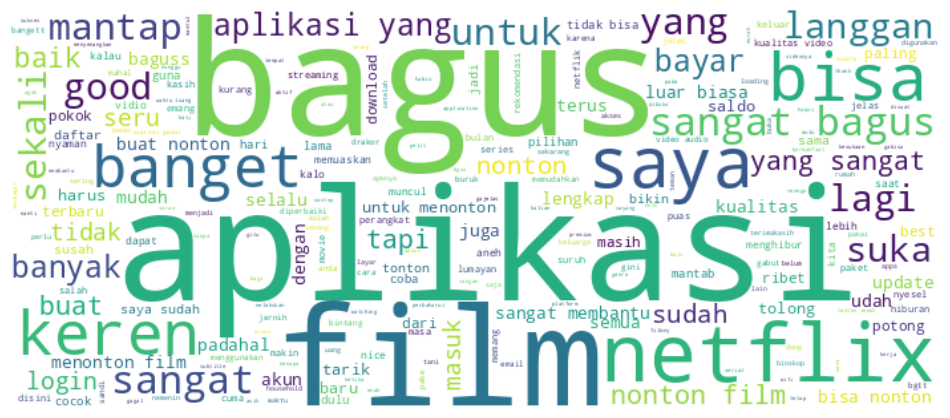

In [ ]:
# membuat visualisasi WordCloud

join_review = ' '.join(review_all)

w_cloud = WordCloud(background_color="white",
                    width=700, height=300, max_font_size=120,
                    max_words=500, contour_color='blue',
                    contour_width=2).generate(str(join_review))

# plot wordcloud
plt.figure(figsize=(12,12))
plt.imshow(w_cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# memasukkan 500 sampel kata beserta jumlah kemunculan ke dalam dataframe

most_freq_df = pd.DataFrame(common_review, columns=['words','count'])
most_freq_df.sort_values(by='count', ascending=False)

,words,count
0,bagus,181
1,aplikasi,159
2,film,135
3,sangat,123
4,yang,84
...,...,...
401,opsi,1
402,pemutaran,1
403,kompetible,1
404,biar,1


In [ ]:
# mengurutkan kata sampel berdasarkan jumlah kemunculan yang diurutkan secara descending
# kemudian mengambil 15 kata sampel

most_freq_df.sort_values(by='count', ascending=False)
top15 = most_freq_df.iloc[:15]

<ipython-input-272-01404f08f827>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




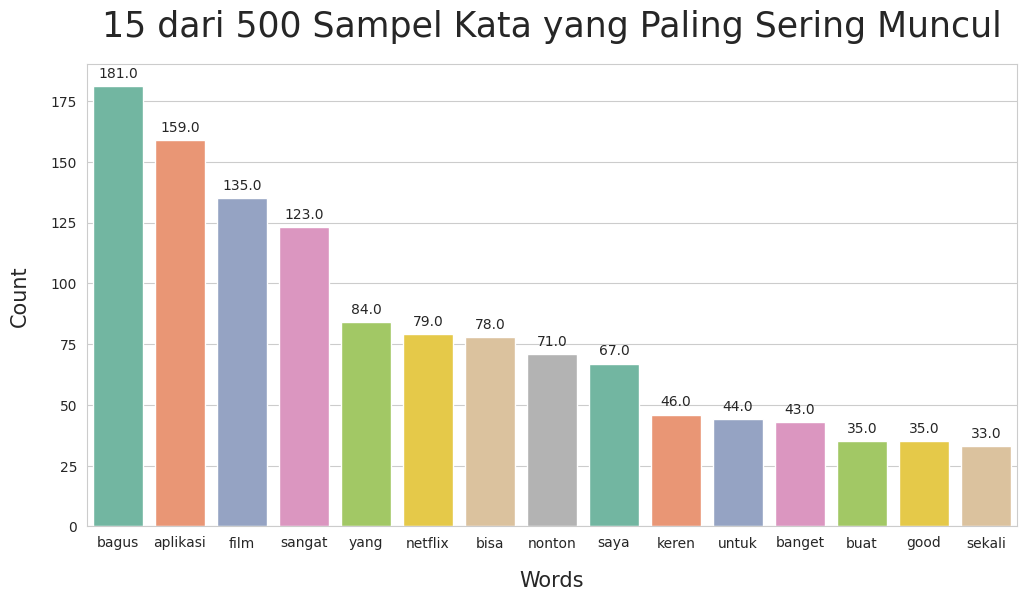

In [ ]:
# membuat visualisasi 15 sampel kata yang paling sering dibicarakan oleh pengguna

plt.figure(figsize=(12,6))
sns.set_style('whitegrid')

ax = sns.barplot(x='words', y='count', data=top15, palette = 'Set2')
for annotate in ax.patches:
  ax.annotate(format(annotate.get_height(), '.1f'),
              (annotate.get_x() + annotate.get_width()/2.,
               annotate.get_height()), ha = 'center', va='center', xytext=(0,9),
               textcoords = 'offset points')
plt.title("15 dari 500 Sampel Kata yang Paling Sering Muncul", fontsize=25, pad=20)
plt.xlabel('Words', fontsize=15, labelpad=15)
plt.ylabel('Count', fontsize=15, labelpad=15)
plt.show()

# Remove Stopword in bahasa

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('popular')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Down

True

In [ ]:
# menampilkan kata stopwords bahasa indonesia
indonesian_stop = stopwords.words('indonesian')

# menghitung jumlah kata stopwords bahasa indonesia
print('length of indonesian stopwords:', len(indonesian_stop))

length of indonesian stopwords: 758


In [ ]:
# memasukkan stopwords bahasa indonesia ke dalam dataframe

stopwords_indo = pd.DataFrame(indonesian_stop, columns=['stopwords_indonenesia'])

In [ ]:
# menyimpan stopwords bahasa indonesia ke dalam format xlsx
stopwords_indo.to_excel('stopwords_indonesian.xlsx', index=False)

## function that used to remove stopwords

In [ ]:
def remove_stopwords(review_text, indo_stopwords):
  tokenize = []
  for token in review_text:
    if token not in indo_stopwords:
      tokenize.append(token)

  return tokenize

netflix['stop_review'] = netflix['token'].apply(lambda stop: remove_stopwords(stop, indonesian_stop))

In [ ]:
netflix.head()

,content,appVersion,clean_review,normalization,final_text,token,stop_review
0,Mantap nonton jadi lebih seru,8.112.1 build 6 50665,mantap nonton jadi lebih seru,mantap nonton jadi lebih seru,mantap nonton jadi lebih seru,"[mantap, nonton, jadi, lebih, seru]","[mantap, nonton, seru]"
1,Lebih di Tingkatkan lagi,8.112.1 build 6 50665,lebih di tingkatkan lagi,lebih di tingkatkan lagi,lebih tingkatkan lagi,"[lebih, tingkatkan, lagi]",[tingkatkan]
2,Aplikasi terbaik buat nonton flim,8.112.1 build 6 50665,aplikasi terbaik buat nonton flim,aplikasi baik buat nonton flim,aplikasi baik buat nonton flim,"[aplikasi, baik, buat, nonton, flim]","[aplikasi, nonton, flim]"
3,Aplikasi bagus,8.112.1 build 6 50665,aplikasi bagus,aplikasi bagus,aplikasi bagus,"[aplikasi, bagus]","[aplikasi, bagus]"
4,"aplikasi luar biasa, mudah di gunakan",8.112.1 build 6 50665,aplikasi luar biasa mudah di gunakan,aplikasi luar biasa mudah di gunakan,aplikasi luar biasa mudah gunakan,"[aplikasi, luar, biasa, mudah, gunakan]","[aplikasi, mudah]"


# Text Normalization
## Stemming Normalization

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [ ]:
def back_to_root(review_text):
  stop_token = ' '.join(review_text)
  stem = StemmerFactory()
  create_stem = stem.create_stemmer()
  result_stem = create_stem.stem(stop_token)
  return result_stem

netflix['stem_review'] = netflix['stop_review'].apply(lambda stem:back_to_root(stem))

In [ ]:
netflix.head()

,content,appVersion,clean_review,normalization,final_text,token,stop_review,stem_review
0,Mantap nonton jadi lebih seru,8.112.1 build 6 50665,mantap nonton jadi lebih seru,mantap nonton jadi lebih seru,mantap nonton jadi lebih seru,"[mantap, nonton, jadi, lebih, seru]","[mantap, nonton, seru]",mantap nonton seru
1,Lebih di Tingkatkan lagi,8.112.1 build 6 50665,lebih di tingkatkan lagi,lebih di tingkatkan lagi,lebih tingkatkan lagi,"[lebih, tingkatkan, lagi]",[tingkatkan],tingkat
2,Aplikasi terbaik buat nonton flim,8.112.1 build 6 50665,aplikasi terbaik buat nonton flim,aplikasi baik buat nonton flim,aplikasi baik buat nonton flim,"[aplikasi, baik, buat, nonton, flim]","[aplikasi, nonton, flim]",aplikasi nonton flim
3,Aplikasi bagus,8.112.1 build 6 50665,aplikasi bagus,aplikasi bagus,aplikasi bagus,"[aplikasi, bagus]","[aplikasi, bagus]",aplikasi bagus
4,"aplikasi luar biasa, mudah di gunakan",8.112.1 build 6 50665,aplikasi luar biasa mudah di gunakan,aplikasi luar biasa mudah di gunakan,aplikasi luar biasa mudah gunakan,"[aplikasi, luar, biasa, mudah, gunakan]","[aplikasi, mudah]",aplikasi mudah


Word cloud dan frequensy

# Data Labeling

In [ ]:
!gdown --id 1hOYYAYMGSd0JoqDcBxjhtVm6koOnk-KQ

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1hOYYAYMGSd0JoqDcBxjhtVm6koOnk-KQ
To: /content/lexicon_positive_ver1.csv
100% 41.4k/41.4k [00:00<00:00, 53.6MB/s]


In [ ]:
!gdown --id 1HVydsM-fsSdIugnuSF6L9-Ai4UnRB_ju

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1HVydsM-fsSdIugnuSF6L9-Ai4UnRB_ju
To: /content/lexicon_negative_ver1.csv
100% 82.8k/82.8k [00:00<00:00, 65.2MB/s]


## Read the positive and negative lexicon

In [ ]:
lexicon_positive = dict()
import csv
with open('lexicon_positive_ver1.csv', 'r') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  for row in reader:
    lexicon_positive[row[0]] = int(row[1])

lexicon_negative = dict()
import csv
with open('lexicon_negative_ver1.csv', 'r') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  for row in reader:
    lexicon_negative[row[0]] = int(row[1])

## Create a function named sentiment_analysis_lexicon_indonesia which contains a for loop and if conditions to label each review

In [ ]:
def sentiment_analysis_lexicon_indonesia(text):
  score = 0
  for word_pos in text:
    if (word_pos in lexicon_positive):
      score = score + lexicon_positive[word_pos]
  for word_neg in text:
    if (word_neg in lexicon_negative):
      score = score + lexicon_negative[word_neg]
  polarity=''
  if (score > 0):
    polarity = 'positif'
  elif (score < 0):
    polarity = 'negatif'
  else:
    polarity = 'netral'

  return score, polarity

## Connect to Google Drive

### Conduct functional tests on dummy sentences.

In [ ]:
string = "aplikasi ini sangat bagus bagus dan jujur"
string = string.split()
hasil = sentiment_analysis_lexicon_indonesia(string)
hasil

(-7, 'negatif')

### Separate the sentences in the stem_review column and then apply the sentiment_analysis_lexicon_indonesia function to that column

In [ ]:
netflix['prepos_text'] = netflix.stem_review.str.split()

In [ ]:
results = netflix['prepos_text'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
netflix['polarity_score'] = results[0]
netflix['polarity'] = results[1]
print(netflix['polarity'].value_counts())

polarity
negatif    323
positif    191
netral     177
Name: count, dtype: int64


In [ ]:
# mengonversikan whitespaces menjadi np.nan kemudian menghapusnya menggunakan fungsi dropna
netflix = netflix.replace('',np.nan, regex=True)
netflix = netflix.dropna()

In [ ]:
# reset index tabel agar urutan menjadi penomoran menjadi lebih rapih
netflix = netflix.reset_index(drop=True)

In [ ]:
print(netflix['polarity'].value_counts())

polarity
negatif    220
positif    150
netral      98
Name: count, dtype: int64


In [ ]:
netflix[(netflix['polarity']=='netral')]

,content,appVersion,clean_review,normalization,final_text,token,stop_review,stem_review,prepos_text,polarity_score,polarity
10,Filmnya keren-keren,8.112.1 build 6 50665,filmnya keren,film keren,film keren,"[film, keren]","[film, keren]",film keren,"[film, keren]",0,netral
13,Apknyg keren,8.112.1 build 6 50665,apknyg keren,apknyg keren,apknyg keren,"[apknyg, keren]","[apknyg, keren]",apknyg keren,"[apknyg, keren]",0,netral
18,Baru download,8.112.1 build 6 50665,baru download,baru download,baru download,"[baru, download]",[download],download,[download],0,netral
21,Keren bgt filmnya update😍,8.111.0 build 4 50659,keren bgt filmnya update,keren bgt film update,keren film update,"[keren, film, update]","[keren, film, update]",keren film update,"[keren, film, update]",0,netral
22,Keren,8.69.0 build 12 50417,keren,keren,keren,[keren],[keren],keren,[keren],0,netral
...,...,...,...,...,...,...,...,...,...,...,...
433,Netflix kon tol,8.111.0 build 4 50659,netflix kon tol,netflix kon tol,netflix,[netflix],[netflix],netflix,[netflix],0,netral
457,Ga bisa login,8.111.0 build 4 50659,ga bisa login,ga bisa login,bisa login,"[bisa, login]",[login],login,[login],0,netral
458,tetap exsis,8.111.0 build 4 50659,tetap exsis,tetap exsis,tetap exsis,"[tetap, exsis]",[exsis],exsis,[exsis],0,netral
462,The best,8.90.1 build 7 50522,the best,the best,best,[best],[best],best,[best],0,netral


### Delete review with neutral sentiment

In [ ]:
# menghapus content yang bersentimen netral karena tujuan dari penelitian ini hanya menggunakan 2 sentimen yaitu positif dan negatif
netflix = netflix.drop(netflix[netflix['polarity'] == 'netral'].index)
netflix = netflix.reset_index(drop=True)

In [ ]:
netflix.head(20)

,content,appVersion,clean_review,normalization,final_text,token,stop_review,stem_review,prepos_text,polarity_score,polarity
0,Mantap nonton jadi lebih seru,8.112.1 build 6 50665,mantap nonton jadi lebih seru,mantap nonton jadi lebih seru,mantap nonton jadi lebih seru,"[mantap, nonton, jadi, lebih, seru]","[mantap, nonton, seru]",mantap nonton seru,"[mantap, nonton, seru]",5,positif
1,Lebih di Tingkatkan lagi,8.112.1 build 6 50665,lebih di tingkatkan lagi,lebih di tingkatkan lagi,lebih tingkatkan lagi,"[lebih, tingkatkan, lagi]",[tingkatkan],tingkat,[tingkat],1,positif
2,Aplikasi terbaik buat nonton flim,8.112.1 build 6 50665,aplikasi terbaik buat nonton flim,aplikasi baik buat nonton flim,aplikasi baik buat nonton flim,"[aplikasi, baik, buat, nonton, flim]","[aplikasi, nonton, flim]",aplikasi nonton flim,"[aplikasi, nonton, flim]",-4,negatif
3,Aplikasi bagus,8.112.1 build 6 50665,aplikasi bagus,aplikasi bagus,aplikasi bagus,"[aplikasi, bagus]","[aplikasi, bagus]",aplikasi bagus,"[aplikasi, bagus]",-6,negatif
4,"aplikasi luar biasa, mudah di gunakan",8.112.1 build 6 50665,aplikasi luar biasa mudah di gunakan,aplikasi luar biasa mudah di gunakan,aplikasi luar biasa mudah gunakan,"[aplikasi, luar, biasa, mudah, gunakan]","[aplikasi, mudah]",aplikasi mudah,"[aplikasi, mudah]",-1,negatif
5,Bagus,8.112.1 build 6 50665,bagus,bagus,bagus,[bagus],[bagus],bagus,[bagus],-2,negatif
6,"Seru bgt nih,, bsa nonton film yg kita sukai.....",8.112.1 build 6 50665,seru bgt nih bsa nonton film yg kita sukai man...,seru bgt nih bsa nonton film yg kita sukai man...,seru nonton film kita sukai mantap dahh,"[seru, nonton, film, kita, sukai, mantap, dahh]","[seru, nonton, film, sukai, mantap, dahh]",seru nonton film suka mantap dahh,"[seru, nonton, film, suka, mantap, dahh]",4,positif
7,Sangat bagus,8.112.1 build 6 50665,sangat bagus,sangat bagus,sangat bagus,"[sangat, bagus]",[bagus],bagus,[bagus],-2,negatif
8,Rekomended buat yg suka nonton film.,8.112.1 build 6 50665,rekomended buat yg suka nonton film,rekomended buat yg suka nonton film,rekomended buat suka nonton film,"[rekomended, buat, suka, nonton, film]","[rekomended, suka, nonton, film]",rekomended suka nonton film,"[rekomended, suka, nonton, film]",2,positif
9,Kualitas gambar bagus & film film terbaru sela...,8.112.1 build 6 50665,kualitas gambar bagus film terbaru selalu upda...,kualitas gambar bagus film terbaru selalu upda...,kualitas gambar bagus film terbaru selalu upda...,"[kualitas, gambar, bagus, film, terbaru, selal...","[kualitas, gambar, bagus, film, terbaru, update]",kualitas gambar bagus film baru update,"[kualitas, gambar, bagus, film, baru, update]",1,positif


### Sentiment visualization

<ipython-input-295-cf87d339f956>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




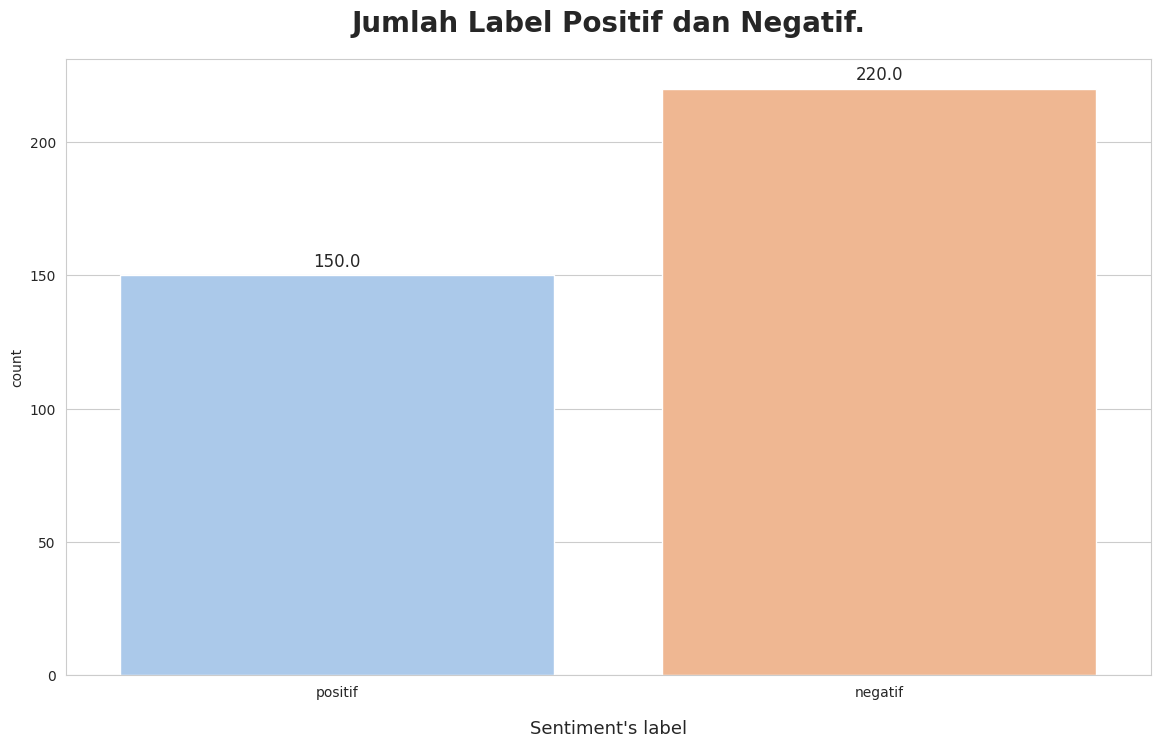

In [ ]:
# membuat visualisasi bar chart untuk menampilkan jumlah sentimen positif dan negatif

fig, ax = plt.subplots(figsize=(14,8))
ax = sns.countplot(x='polarity', data=netflix, palette="pastel")

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 3.25,rect.get_height(),horizontalalignment='center', fontsize = 12)

plt.title("Jumlah Label Positif dan Negatif.", fontsize=20, fontweight='bold',pad=20)
plt.xlabel("Sentiment's label", fontsize=13, labelpad=15)
plt.ylim(0)
plt.show()

In [ ]:
# mengonversikan sentimen menjadi 1 untuk positif dan -1 untuk negatif
polarity = []
for convert in netflix['polarity']:
  if convert == "positif":
    num_polarity = 1
  else:
    num_polarity = -1

  polarity.append(num_polarity)
netflix['polarity'] = polarity

In [ ]:
netflix['polarity']

0      1
1      1
2     -1
3     -1
4     -1
      ..
365   -1
366   -1
367   -1
368   -1
369   -1
Name: polarity, Length: 370, dtype: int64

In [ ]:
netflix.polarity.value_counts()

polarity
-1    220
 1    150
Name: count, dtype: int64

In [ ]:
print("percentage of sentiment:")
train_pct_pos = netflix.polarity.value_counts()[1]/netflix.polarity.value_counts().sum()*100
print("percentage of positive sentiment:", round(train_pct_pos,2), '%')

train_pct_neg = netflix.polarity.value_counts()[-1]/netflix.polarity.value_counts().sum()*100
print("percentage of negative sentiment:", round(train_pct_neg,2), '%')

print("difference between percentage positive and negative:", round(train_pct_pos-train_pct_neg,2), '%')

percentage of sentiment:
percentage of positive sentiment: 40.54 %
percentage of negative sentiment: 59.46 %
difference between percentage positive and negative: -18.92 %


### Sentiment WordCloud

#### Wordcloud for positive sentiment

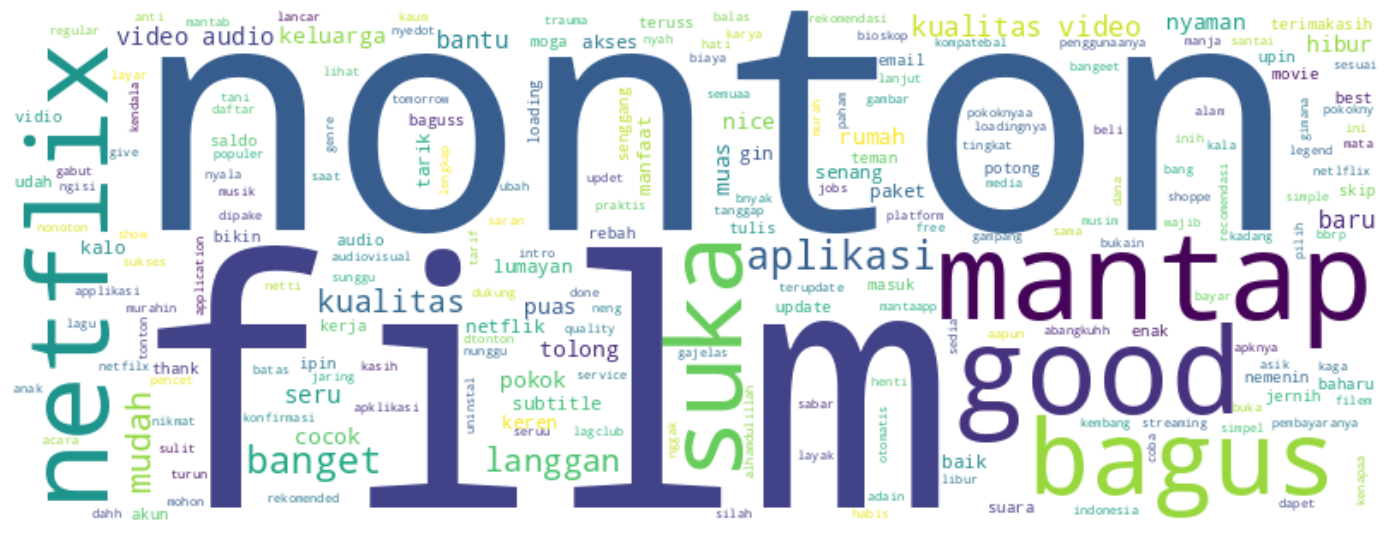

In [ ]:
sentiment_pos = ' '.join([review for review in netflix['stem_review'][netflix['polarity'] == 1]])

# create object wordcloud
w_pos = WordCloud(background_color="white",
                  width=800, height=300, max_font_size=200,
                  max_words=500).generate(sentiment_pos)

plt.figure(figsize=(14,8))
plt.axis("off")
plt.tight_layout()
plt.imshow(w_pos, interpolation="bilinear")
plt.show()

#### Wordcloud for negative sentiment

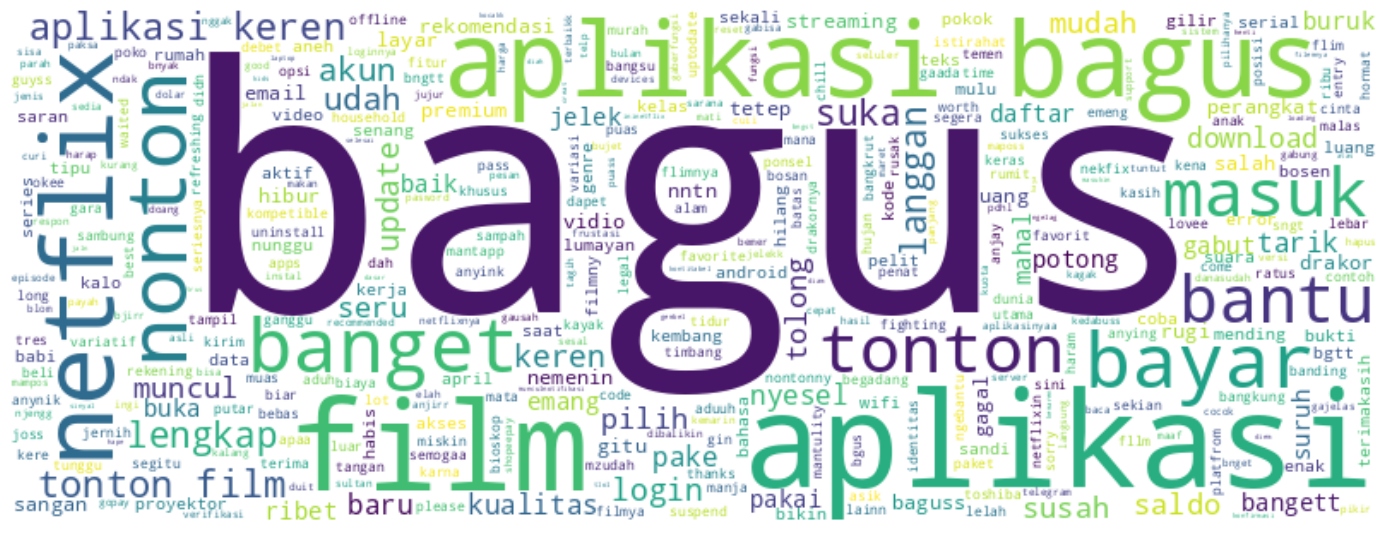

In [ ]:
sentiment_neg = ' '.join([review for review in netflix['stem_review'][netflix['polarity'] == -1]])

# create object wordcloud
w_neg = WordCloud(background_color="white",
                  width=800, height=300, max_font_size=200,
                  max_words=500).generate(sentiment_neg)

plt.figure(figsize=(14,8))
plt.axis("off")
plt.tight_layout()
plt.imshow(w_neg, interpolation="bilinear")
plt.show()

In [ ]:
netflix = netflix.replace('',np.nan, regex=True)

In [ ]:
netflix = netflix.dropna()

In [ ]:
netflix = netflix.reset_index(drop=True)

In [ ]:
netflix.to_excel("netflix_fix_dataset.xlsx", index=False)



---



# Split the review into data train and test

In [ ]:
X = netflix['stem_review']
y = netflix['polarity']

In [ ]:
netflix.head()

,content,appVersion,clean_review,normalization,final_text,token,stop_review,stem_review,prepos_text,polarity_score,polarity
0,Mantap nonton jadi lebih seru,8.112.1 build 6 50665,mantap nonton jadi lebih seru,mantap nonton jadi lebih seru,mantap nonton jadi lebih seru,"[mantap, nonton, jadi, lebih, seru]","[mantap, nonton, seru]",mantap nonton seru,"[mantap, nonton, seru]",5,1
1,Lebih di Tingkatkan lagi,8.112.1 build 6 50665,lebih di tingkatkan lagi,lebih di tingkatkan lagi,lebih tingkatkan lagi,"[lebih, tingkatkan, lagi]",[tingkatkan],tingkat,[tingkat],1,1
2,Aplikasi terbaik buat nonton flim,8.112.1 build 6 50665,aplikasi terbaik buat nonton flim,aplikasi baik buat nonton flim,aplikasi baik buat nonton flim,"[aplikasi, baik, buat, nonton, flim]","[aplikasi, nonton, flim]",aplikasi nonton flim,"[aplikasi, nonton, flim]",-4,-1
3,Aplikasi bagus,8.112.1 build 6 50665,aplikasi bagus,aplikasi bagus,aplikasi bagus,"[aplikasi, bagus]","[aplikasi, bagus]",aplikasi bagus,"[aplikasi, bagus]",-6,-1
4,"aplikasi luar biasa, mudah di gunakan",8.112.1 build 6 50665,aplikasi luar biasa mudah di gunakan,aplikasi luar biasa mudah di gunakan,aplikasi luar biasa mudah gunakan,"[aplikasi, luar, biasa, mudah, gunakan]","[aplikasi, mudah]",aplikasi mudah,"[aplikasi, mudah]",-1,-1


In [ ]:
from sklearn.model_selection import train_test_split

### Mencari parameter untuk data splitting terbaik yang menghasilkan nilai akurasi paling tinggi dan meminimalisir model melakukan kesalahan prediksi

In [ ]:
test_num = []
random_num = []
acc_num = []
re_num = []
pre_num = []
matrix = []
report = []

for test in np.arange(0.1, 0.4, 0.1):
  for random in np.arange(0, 30, 5):
    print("test size:", test)
    print("random state:", random)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test, random_state=random)
    vectorizer = TfidfVectorizer(use_idf=True, smooth_idf=False)
    X_train_vect = vectorizer.fit_transform(X_train)
    X_test_vect = vectorizer.transform(X_test)
    Naive_bayes = MultinomialNB()
    Naive_bayes.fit(X_train_vect, y_train)
    print(Naive_bayes.score(X_train_vect, y_train))
    predict = Naive_bayes.predict(X_test_vect)
    accuracy = accuracy_score(y_test, predict)
    confusion = confusion_matrix(y_test, predict)
    print('confusion matrix:\n', confusion)
    classfication = print(classification_report(y_test, predict))
    print("Accuracy Score:", accuracy.round(2))
    recall = recall_score(y_test, predict)
    print("Recall Score:", recall)
    precision = precision_score(y_test, predict)
    print("Precision Score:", precision)
    print("\n")

    random_num.append(random)
    matrix.append(confusion)
    report.append(classfication)
    acc_num.append(accuracy)
    re_num.append(recall)
    pre_num.append(precision)
    test_num.append(test)
  print("=================================================================")

test size: 0.1
random state: 0
0.924924924924925
confusion matrix:
 [[19  0]
 [ 4 14]]
              precision    recall  f1-score   support

          -1       0.83      1.00      0.90        19
           1       1.00      0.78      0.88        18

    accuracy                           0.89        37
   macro avg       0.91      0.89      0.89        37
weighted avg       0.91      0.89      0.89        37

Accuracy Score: 0.89
Recall Score: 0.7777777777777778
Precision Score: 1.0


test size: 0.1
random state: 5
0.93993993993994
confusion matrix:
 [[22  3]
 [ 3  9]]
              precision    recall  f1-score   support

          -1       0.88      0.88      0.88        25
           1       0.75      0.75      0.75        12

    accuracy                           0.84        37
   macro avg       0.81      0.81      0.81        37
weighted avg       0.84      0.84      0.84        37

Accuracy Score: 0.84
Recall Score: 0.75
Precision Score: 0.75


test size: 0.1
random state: 10


In [ ]:
# memasukkan data ke dalam dataframe

data = {'test_size':test_num,
        'random_state':random_num,
        'confusion_matrix': matrix,
        'accuracy': acc_num,
        'recall': re_num,
        'precision': pre_num}

optimal = pd.DataFrame(data)
optimal
# optimal = optimal.sort_values(by=['accuracy','recall','precision'], ascending=True)

,test_size,random_state,confusion_matrix,accuracy,recall,precision
0,0.1,0,"[[19, 0], [4, 14]]",0.891892,0.777778,1.000000
1,0.1,5,"[[22, 3], [3, 9]]",0.837838,0.750000,0.750000
2,0.1,10,"[[17, 0], [5, 15]]",0.864865,0.750000,1.000000
3,0.1,15,"[[19, 2], [4, 12]]",0.837838,0.750000,0.857143
4,0.1,20,"[[25, 0], [5, 7]]",0.864865,0.583333,1.000000
5,0.1,25,"[[20, 1], [1, 15]]",0.945946,0.937500,0.937500
6,0.2,0,"[[40, 1], [9, 24]]",0.864865,0.727273,0.960000
7,0.2,5,"[[42, 7], [9, 16]]",0.783784,0.640000,0.695652
8,0.2,10,"[[38, 3], [8, 25]]",0.851351,0.757576,0.892857
9,0.2,15,"[[42, 1], [8, 23]]",0.878378,0.741935,0.958333


In [ ]:
# mengatur desimal akurasi, recall, dan precision menjadi 2 angka dibelakang koma

optimal['accuracy'] = optimal['accuracy'].apply(lambda floats:format(float(floats), ".2f"))
optimal['recall'] = optimal['recall'].apply(lambda floats:format(float(floats), ".2f"))
optimal['precision'] = optimal['precision'].apply(lambda floats:format(float(floats), ".2f"))
optimal['test_size'] = optimal['test_size'].apply(lambda floats:format(float(floats), ".1f"))
optimal

,test_size,random_state,confusion_matrix,accuracy,recall,precision
0,0.1,0,"[[19, 0], [4, 14]]",0.89,0.78,1.00
1,0.1,5,"[[22, 3], [3, 9]]",0.84,0.75,0.75
2,0.1,10,"[[17, 0], [5, 15]]",0.86,0.75,1.00
3,0.1,15,"[[19, 2], [4, 12]]",0.84,0.75,0.86
4,0.1,20,"[[25, 0], [5, 7]]",0.86,0.58,1.00
5,0.1,25,"[[20, 1], [1, 15]]",0.95,0.94,0.94
6,0.2,0,"[[40, 1], [9, 24]]",0.86,0.73,0.96
7,0.2,5,"[[42, 7], [9, 16]]",0.78,0.64,0.70
8,0.2,10,"[[38, 3], [8, 25]]",0.85,0.76,0.89
9,0.2,15,"[[42, 1], [8, 23]]",0.88,0.74,0.96


### Visualisasi grafik untuk melihat kenaikan akurasi terbaik berdasarkan test_size

In [ ]:
import plotly.express as px
fig = px.line(optimal, x='random_state', y='accuracy',color='test_size',
              text='accuracy', markers=True)
fig.update_traces(textposition='top left')
fig.show()

### Visualisasi grafik untuk melihat kenaikan recall terbaik berdasarkan test_size

In [ ]:
import plotly.express as px
fig = px.line(optimal, x='random_state', y='recall',color='test_size',
              text='recall', markers=True)
fig.update_traces(textposition='top left')
fig.show()

### Visualisasi grafik untuk melihat kenaikan precision terbaik berdasarkan test_size

In [ ]:
import plotly.express as px
fig = px.line(optimal, x='random_state', y='precision',color='test_size',
              text='precision', markers=True)
fig.update_traces(textposition='top left')
fig.show()

## Data Splitting into data train and data test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.10,
                                                    random_state=0)

In [ ]:
X_test.to_csv("netflix_testing.csv", index=False)

In [ ]:
y_test.to_csv("netflix_testing_label.csv", index=False)

In [ ]:
X_train.shape

(333,)

In [ ]:
X_test.shape

(37,)

In [ ]:
X_train

217                                 good
135                               mantap
5                                  bagus
64                                  puas
68                       good film bagus
                     ...                
323                                 suka
192                 mudah mudah mantaapp
117    gara household kode email langgan
47       semogaa aplikasi favorite dunia
172                               senang
Name: stem_review, Length: 333, dtype: object

In [ ]:
print(X_train)

217                                 good
135                               mantap
5                                  bagus
64                                  puas
68                       good film bagus
                     ...                
323                                 suka
192                 mudah mudah mantaapp
117    gara household kode email langgan
47       semogaa aplikasi favorite dunia
172                               senang
Name: stem_review, Length: 333, dtype: object


# Vector Representation

## TF IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer(use_idf=True, smooth_idf=False)
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)
dense_num = X_train_vect.todense()

In [ ]:
y_train.shape

(333,)

In [ ]:
X_train_vect

<333x480 sparse matrix of type '<class 'numpy.float64'>'
	with 1339 stored elements in Compressed Sparse Row format>

In [ ]:
print(X_train_vect)

  (0, 155)	1.0
  (1, 257)	1.0
  (2, 36)	1.0
  (3, 346)	1.0
  (4, 126)	0.4935130746054019
  (4, 36)	0.4408458761430422
  (4, 155)	0.7497331249726108
  (5, 36)	1.0
  (6, 51)	1.0
  (7, 427)	0.6378536781807279
  (7, 305)	0.7701575716899213
  (8, 209)	0.8637362281751636
  (8, 23)	0.503944171647755
  (9, 408)	0.951018614804896
  (9, 36)	0.3091336188358954
  (10, 265)	0.38203799808797045
  (10, 88)	0.38203799808797045
  (10, 74)	0.29172460658388455
  (10, 107)	0.30424627688614136
  (10, 307)	0.30424627688614136
  (10, 15)	0.38203799808797045
  (10, 58)	0.38203799808797045
  (10, 182)	0.38203799808797045
  (11, 36)	1.0
  (12, 287)	0.48586830872203174
  :	:
  (326, 461)	0.3740805485874651
  (326, 344)	0.47404216652798437
  (326, 302)	0.5077065051901949
  (326, 51)	0.3461444448450285
  (327, 204)	0.510508309582763
  (327, 40)	0.4059218180168255
  (327, 235)	0.3849409182019403
  (327, 448)	0.39477399498906957
  (327, 287)	0.26691920954017173
  (327, 23)	0.18819659897475216
  (327, 51)	0.348054660

In [ ]:
df_tf = pd.DataFrame(X_train_vect.todense(), columns = vectorizer.get_feature_names_out())
df_tf.to_excel('tfidf.xlsx', index=False, header=True)



---



# Data Modeling

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [ ]:
from sklearn.naive_bayes import MultinomialNB
Naive_bayes = MultinomialNB()
Naive_bayes.fit(X_train_vect, y_train)

MultinomialNB()

In [ ]:
predict = Naive_bayes.predict(X_test_vect)

In [ ]:
predict

array([-1, -1, -1, -1,  1, -1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1, -1,
        1, -1, -1,  1, -1, -1, -1,  1, -1, -1,  1, -1, -1, -1, -1, -1,  1,
       -1, -1, -1])

In [ ]:
predict_df = pd.DataFrame(predict, columns=['predict'])
# predict_df['y_actual'] = y_test.ravel()

In [ ]:
predict_df

,predict
0,-1
1,-1
2,-1
3,-1
4,1
5,-1
6,1
7,1
8,-1
9,1


In [ ]:
print(Naive_bayes) # values of weight

MultinomialNB()


In [ ]:
print(Naive_bayes.class_log_prior_) # values of b

[-0.50483758 -0.92534057]


In [ ]:
print(Naive_bayes.classes_) # class of sentiment

[-1  1]


In [ ]:
print(Naive_bayes.feature_log_prob_)

[[-6.74816373 -6.74816373 -6.74816373 -6.74816373 -6.41637012 -6.41637012
  -6.12930709 -6.14589492 -5.73109956 -6.41766502 -6.74816373 -6.51690398
  -6.36694966 -6.11817834 -6.24928761 -6.42460451 -6.74816373 -6.49377022
  -6.49377022 -6.49377022 -6.39633101 -6.74816373 -6.74816373 -3.29457962
  -6.07981213 -6.74816373 -6.74816373 -6.26707353 -6.46945884 -6.19757649
  -6.33891016 -6.33094163 -6.74816373 -6.74816373 -6.29114503 -6.44055691
  -2.93041748 -5.78099893 -6.74816373 -6.1423262  -5.75693926 -6.74816373
  -6.74816373 -4.82095905 -5.46272049 -6.29500196 -6.26148747 -6.27348592
  -4.84833719 -5.63072778 -6.39067796 -4.99563393 -6.74816373 -6.28010195
  -6.29241734 -6.33702944 -6.4327483  -6.37032357 -6.42460451 -6.2726108
  -6.55530904 -6.31890061 -6.41811502 -6.23872828 -6.56472667 -6.26438002
  -6.44055691 -6.48276049 -6.43264309 -6.19273321 -6.30962984 -6.31384337
  -6.02051225 -6.47244709 -5.92401758 -6.74816373 -6.38186247 -6.4327483
  -5.71586703 -6.26094582 -6.3997908  -6

In [ ]:
Naive_bayes.score(X_train_vect, y_train) # the mean accuracy on the given train data and labels.

0.924924924924925

In [ ]:
Naive_bayes.score(X_test_vect, y_test) # the mean accuracy on the given train data and labels.

0.8918918918918919

In [ ]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, predict))

0.43243243243243246




---



## Final Visualization that represented the result of Predicted

In [ ]:
predict_df = pd.DataFrame(predict, columns=['predictvalues'])
polarity = ""
sentimen = []
for sentiment in predict_df['predictvalues']:
  if sentiment == 1:
    polarity = "positif"
  else:
    polarity = "negatif"

  sentimen.append(polarity)

predict_df['sentimen'] = sentimen

print(predict_df.predictvalues.value_counts()[1])
print(predict_df.predictvalues.value_counts()[-1])

14
23


In [ ]:
prediction_df_group = predict_df.groupby(['predictvalues'])[['sentimen']].count().reset_index()
prediction_df_group

,predictvalues,sentimen
0,-1,23
1,1,14


In [ ]:
print("Number of sentiment after modelling:")
sen_pos = predict_df.predictvalues.value_counts()[1]/predict_df.predictvalues.value_counts().sum()*100
print("percentage of positive sentiment:", round(sen_pos,2), '%')

sen_neg = predict_df.predictvalues.value_counts()[-1]/predict_df.predictvalues.value_counts().sum()*100
print("percentage of negative sentiment:", round(sen_neg,2), '%')

print("difference between percentage positive and negative:", round(sen_pos-sen_neg,2), '%')

Number of sentiment after modelling:
percentage of positive sentiment: 37.84 %
percentage of negative sentiment: 62.16 %
difference between percentage positive and negative: -24.32 %


### Pie Chart

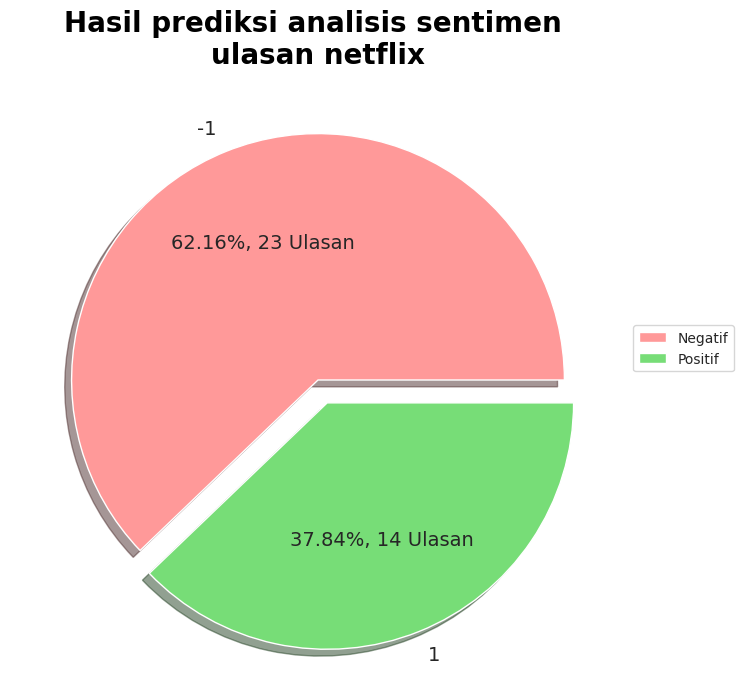

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
explode = (0,0.1)
my_colors = ['#ff9999','#77dd77']
ax.pie(prediction_df_group.sentimen, labels=prediction_df_group.predictvalues,
         autopct=lambda p:f'{p:.2f}%, {p*sum(prediction_df_group.sentimen)/100 :.0f} Ulasan', explode=explode, shadow=True, colors=my_colors,
          startangle=0, textprops={'fontsize': 14})
ax.set_title('Hasil prediksi analisis sentimen \nulasan netflix', color='black',weight='bold',fontsize=20)

plt.legend(bbox_to_anchor = (1,0.6),labels=['Negatif','Positif'])

plt.show()



---



# Evaluation

In [ ]:
matrix = confusion_matrix(y_test, predict)
matrix

array([[19,  0],
       [ 4, 14]])

### Confusion matrix visualization

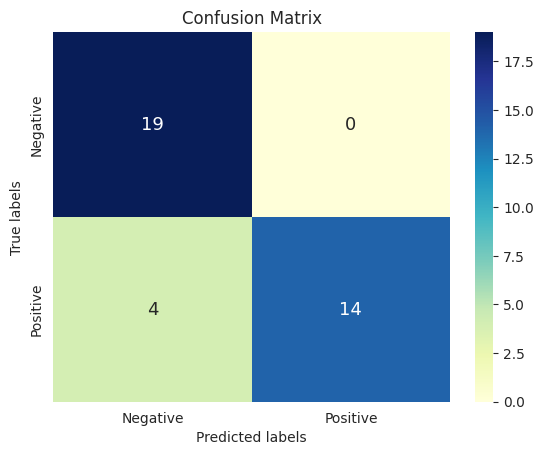

In [ ]:
ax = plt.subplots()
ax = sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g',
            annot_kws={"fontsize":13})

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Positive'])
plt.show()

In [ ]:
target_names = ['Negative','Positive']
print(classification_report(y_test, predict, target_names=target_names))

              precision    recall  f1-score   support

    Negative       0.83      1.00      0.90        19
    Positive       1.00      0.78      0.88        18

    accuracy                           0.89        37
   macro avg       0.91      0.89      0.89        37
weighted avg       0.91      0.89      0.89        37



In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

akurasi = accuracy_score(y_test, predict)
print("Accuracy model:", round(akurasi,2))

recall = recall_score(y_test, predict)
print("Recall model:", round(recall,2))

precision = precision_score(y_test, predict)
print("Precision model:", round(precision,2))

Accuracy model: 0.89
Recall model: 0.78
Precision model: 1.0
